Автор материала: Зраев Артем.

Можно использовать в каких угодно целях.

<b> В задании нужно загрузить датасет с данными оттока и ответить на несколько вопросов (написать код). При этом сам датасет уже есть и его необязательно качать с репозитория</b>

Цель задания: проверить базовые навыки работы студентов с Pandas, умение проводить такой же базовый EDA (exploratory data analysis), делать feature engineering и обучать и валидировать модель.

Список столбцов с типами данных в датасете:

- customerID           object
- gender               object
- SeniorCitizen         int64
- Partner              object
- Dependents           object
- tenure                int64
- PhoneService         object
- MultipleLines        object
- InternetService      object
- OnlineSecurity       object
- OnlineBackup         object
- DeviceProtection     object
- TechSupport          object
- StreamingTV          object
- StreamingMovies      object
- Contract             object
- PaperlessBilling     object
- PaymentMethod        object
- MonthlyCharges      float64
- TotalCharges         object
- Churn                object

Данные лежат на google диске по [ссылке](https://drive.google.com/file/d/1g8lsZO25O2SxuCrIYVSDV3eLqmfC-TCZ/view?usp=sharing).

In [1]:
!wget 'https://drive.google.com/uc?export=download&id=1g8lsZO25O2SxuCrIYVSDV3eLqmfC-TCZ' -O WA_Fn-UseC_-Telco-Customer-Churn.csv

--2022-02-28 18:15:02--  https://drive.google.com/uc?export=download&id=1g8lsZO25O2SxuCrIYVSDV3eLqmfC-TCZ
Resolving drive.google.com (drive.google.com)... 142.251.8.101, 142.251.8.113, 142.251.8.102, ...
Connecting to drive.google.com (drive.google.com)|142.251.8.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hvf4hk7a451omehurvkbm9dun5kn41jl/1646072100000/14904333240138417226/*/1g8lsZO25O2SxuCrIYVSDV3eLqmfC-TCZ?e=download [following]
--2022-02-28 18:15:03--  https://doc-08-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hvf4hk7a451omehurvkbm9dun5kn41jl/1646072100000/14904333240138417226/*/1g8lsZO25O2SxuCrIYVSDV3eLqmfC-TCZ?e=download
Resolving doc-08-c0-docs.googleusercontent.com (doc-08-c0-docs.googleusercontent.com)... 142.251.8.132, 2404:6800:4008:c15::84
Connecting to doc-08-c0-docs.googleusercontent.com (doc-08-c0-docs.goog

In [2]:
import pandas as pd
import numpy as np
import random

from sklearn.model_selection import train_test_split

df = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


##### 1. Какое соотношение мужчин и женщин в представленном наборе данных?

In [3]:
#Ваш код здесь
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

##### 2. Какое количество уникальных значений у поля InternetService?

In [4]:
#Ваш код здесь
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [5]:
df['InternetService'].nunique()

3

##### 3. Выведите статистики по полю TotalCharges (median, mean, std).

In [6]:
#Ваш код здесь
df['TotalCharges'].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

В чем странность того, что вы получили? (подсказка: смотреть нужно на тип данных)

__Ответ:__
Данные в этой колонке не являются числовыми(int, float), соответственно обозначенные в задании статистики(median, mean, std) не выводятся. 

##### 4. Сделайте замену значений поля PhoneService  на числовые (Yes->1, No->0)

In [7]:
#Ваш код здесь
df['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [8]:
yes_no_to_numbers = {'Yes': 1, 'No': 0}
df['PhoneService'] = df['PhoneService'].replace(yes_no_to_numbers)
df['PhoneService'].value_counts()

1    6361
0     682
Name: PhoneService, dtype: int64

##### 5. Сделайте замену пробелов в поле TotalCharges на np.nan и приведите поле к типу данных float32. Затем заполните оставшиеся пропуски значением 0 с помощью метода fillna у столбца. Снова выведите статистики и сравните с тем, что вы видели в вопросе 3

In [9]:
#Ваш код здесь
df['TotalCharges'].head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

In [10]:
df.loc[(df.TotalCharges == ' '), 'TotalCharges'] = np.nan

In [11]:
df['TotalCharges'] = df['TotalCharges'].astype(np.float32)
df['TotalCharges']

0         29.850000
1       1889.500000
2        108.150002
3       1840.750000
4        151.649994
           ...     
7038    1990.500000
7039    7362.899902
7040     346.450012
7041     306.600006
7042    6844.500000
Name: TotalCharges, Length: 7043, dtype: float32

In [12]:
df['TotalCharges'].isna().sum()

11

In [13]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [14]:
df['TotalCharges'].isna().sum()

0

In [15]:
df['TotalCharges'].describe()

count    7043.000000
mean     2279.732178
std      2266.794434
min         0.000000
25%       398.549988
50%      1394.550049
75%      3786.599976
max      8684.799805
Name: TotalCharges, dtype: float64

Теперь после обработки данных статистика по этому столбцу выдается корректно.

##### 6. Сделайте замену значений поля Churn на числовые (Yes -> 1, No - 0)

In [16]:
#Ваш код здесь
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [17]:
df['Churn'] = df['Churn'].replace(yes_no_to_numbers)
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

##### 7. Сделайте замену значений полей StreamingMovies, StreamingTV, TechSupport  на числовые (Yes -> 1, No -> 0, No internet service->0)

In [18]:
#Ваш код здесь
df['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [19]:
df['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [20]:
df['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [21]:
data_to_numbers = {'Yes': 1, 'No': 0, 'No internet service': 0}
df['StreamingMovies'] = df['StreamingMovies'].replace(data_to_numbers)
df['StreamingTV'] = df['StreamingTV'].replace(data_to_numbers)
df['TechSupport'] = df['TechSupport'].replace(data_to_numbers)

In [22]:
df['StreamingMovies'].value_counts()

0    4311
1    2732
Name: StreamingMovies, dtype: int64

In [23]:
df['StreamingTV'].value_counts()

0    4336
1    2707
Name: StreamingTV, dtype: int64

In [24]:
df['TechSupport'].value_counts()

0    4999
1    2044
Name: TechSupport, dtype: int64

##### 8. Заполните пропуски в поле PhoneService значением 0

In [25]:
#Ваш код здесь
df['PhoneService'].isna().sum()

0

Я так понял, в этом поле и так нет пропусков...

##### 8. Для нашего датасета оставьте только указанный ниже список полей, удалив все другие и выведите верхние 3 строки

In [26]:
columns = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 
           'StreamingMovies', 'StreamingTV', 'TechSupport', 'Churn']
#Ваш код здесь
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [27]:
df = df[columns]
df.columns

Index(['gender', 'tenure', 'PhoneService', 'TotalCharges', 'StreamingMovies',
       'StreamingTV', 'TechSupport', 'Churn'],
      dtype='object')

##### 9. Разделите датасет на тренировочную и тестовую выборку.

In [28]:
features = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 'StreamingMovies', 'StreamingTV', 'TechSupport']
target = 'Churn'
#Ваш код здесь
X = df[features]
y = df[target]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)

##### 10. соберите pipeline для поля gender (нужно разобраться и изучить https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html ) из классов ColumnSelector и OHEEncoder, которые уже написаны ниже заранее

In [42]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

class ColumnSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in test_columns:
            if col_ not in self.columns:
                X[col_] = 0
        return X[self.columns]

gender = Pipeline([
                   ('column_selector', ColumnSelector('gender')),
                   ('OHE_encoder', OHEEncoder('gender'))
]) #Ваш код здесь

##### 11. Вызовите метод fit_transform у пайплайна gender и передайте туда нашу тренировочную выборку (пример по ссылке из документации https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline.fit)

In [43]:
#Ваш код здесь
gender.fit_transform(X_train, y_train)

,gender_Female,gender_Male
298,0,1
3318,0,1
5586,1,0
6654,1,0
5362,0,1
...,...,...
3772,0,1
5191,1,0
5226,0,1
5390,0,1


##### 12. Здесь код писать уже не нужно (все сделано за вас). К полю tenure применяем StandardScaler (нормируем и центрируем). Ссылка - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
Вопрос - в каких случаях это может быть полезно?

In [44]:
from sklearn.preprocessing import StandardScaler

tenure =  Pipeline([
                ('selector', NumberSelector(key='tenure')),
                ('standard', StandardScaler())
            ])

Это может быть полезно в обучающих моделях, алгоритмы которых требуют нормирования и центрирования данных, например, в линейных моделях

##### 13. Напишите аналогичный (как для tenure) преобразователь поля TotalCharges

In [45]:
#Ваш код здесь
TotalCharges = Pipeline([
                          ('selector', NumberSelector(key='TotalCharges')),
                          ('standart', StandardScaler())
])


Объединение всех "кубиков" очень легко сделать таким образом

In [46]:
from sklearn.pipeline import FeatureUnion

number_features = Pipeline([
                ('selector', ColumnSelector(key=['PhoneService',
                                                 'StreamingMovies', 'StreamingTV', 
                                                 'TechSupport']))
            ])

In [47]:
feats = FeatureUnion([('tenure', tenure),
                      ('TotalCharges', TotalCharges),
                      ('continuos_features', number_features),
                      ('gender', gender)])
feature_processing = Pipeline([('feats', feats)])

На этом этапе что мы сделали:
1. написали преобразователь поля gender, который делает OHE кодирование
2. написали преобразователь для поля tenure, который нормирует и центрирует его 
3. повторили п. 2 для поля TotalCharges
3. для всех остальных просто взяли признаки как они есть, без изменений

У нас уже готов наш пайплайн, который преобразовывает признаки. Давайте обучим модель поверх него. В качестве модели возьмем RandomForestClassifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('features', feats),
    ('classifier', RandomForestClassifier(random_state=42)),
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('tenure',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='tenure')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('TotalCharges',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='TotalCharges')),
                                                                 ('standart',
                                                                  StandardScaler())])),
                                                ('continuos_features',
                                                 Pipeline(steps=[('selector',
          

##### 14. Сделайте прогноз вероятности оттока для X_test с помощью нашего предобученного на предыдущем шаге пайплайна и убедитесь что вам возвращаются вероятности для 2 классов

In [49]:
#Ваш код здесь
preds = pipeline.predict_proba(X_test)
preds

array([[0.26, 0.74],
       [1.  , 0.  ],
       [0.99, 0.01],
       ...,
       [0.24, 0.76],
       [0.13, 0.87],
       [0.8 , 0.2 ]])

##### 15. Посчитайте метрики качества получившейся модели (roc_auc)

In [53]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

#Ваш код здесь
preds_1 = preds[:, 1]
roc_auc_score(y_test, preds_1)

0.7847653596267674

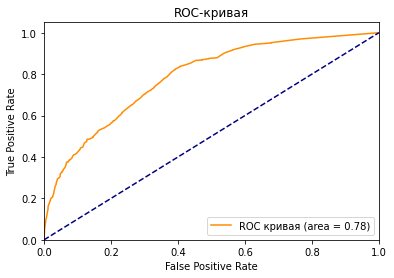

In [54]:
from matplotlib import pyplot as plt
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(y_test, preds_1)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

### Сохраним наш пайплайн

In [55]:
import dill
with open("model_RF.dill", "wb") as f:
    dill.dump(pipeline, f)